<a href="https://colab.research.google.com/github/Ava-creates/Support-Vector-Machine/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear SVM with Stochastic Gradient Descent 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler  # for normalization
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score 
from sklearn.datasets import load_breast_cancer

loading the data and normalising it <br>

relabelling the Y targets to +1/-1.

In [ ]:
#Load breast cancer dataset
data = load_breast_cancer()

X=data["data"]
y=data["target"]
y=y.reshape((X.shape[0],1))
# make labels +1/-1 instead of 0 and 1's

y= np.where(y ==0, -1, 1)

print(y[1:10])
from sklearn.preprocessing import MinMaxScaler
# Do a Min/Max normalization on input data
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

print(X[:3,])


[[-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]]
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]


In [ ]:
#append ones in the input data for bias terms

b=np.ones((X.shape[0],1))

X_test_scaled=np.hstack((b,X))

print(X.shape,y.shape)

#split training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(569, 30) (569, 1)
(455, 30) (114, 30)


setting the hyperparameter

In [ ]:
#Define Constants

#Hyperparameter for softmargin hinge loss
C = 1000

#learninf rate
alpha =  0.00000001


<h3>Loss function for the Primal SVM</h3>

$$J(\mathrm{w})=\frac{1}{2}\|\mathrm{w}\|^{2}+C\left[\frac{1}{N} \sum_{i}^{n} \max \left(0,1-y_{i} *\left(\mathrm{w} \cdot x_{i}+b\right)\right)\right]$$
Or we can rewrite it as

$$J(\mathrm{w})=\frac{1}{N} \sum_{i}^{n}\left[\frac{1}{2}\|\mathrm{w}\|^{2}+C \max \left(0,1-y_{i} *\left(\mathrm{w} \cdot x_{i}\right)\right)\right]$$

calculating the loss

In [ ]:
def calculate_loss(X,y,w):
  n=X.shape[0]
  loss=0
  add= (1/2)*(w.T@w)
 
  for i in range(0,n,1):
    ##print(1-y[i]*(X[i, : ]@w))
    loss+=(max(0, (1-y[i]*(X[i]@w))))

  loss=(loss*C)/n
  

  return loss+add

<h3>Gradient of the loss function for the Primal SVM</h3>

$$
\nabla_{w} J(\mathrm{w})=\frac{1}{N} \sum_{i}^{n}\left\{\begin{array}{ll}
\mathrm{w} & \text { if } \max \left(0,1-y_{i} *\left(\mathrm{w} \cdot x_{i}\right)\right)=0 \\
\mathrm{w}-C y_{i} x_{i} & \text { otherwise }
\end{array}\right.
$$

calculating the gradient


In [ ]:
def calculate_gradient(Xi,yi,w,N):
    
    
    gw= np.asarray(w)
    #print(yi*(Xi@w))
    #` print(w)
    #print(Xi)
    
    if(max(0, (1-yi*(Xi@w)))==0):
      return w/N
    else:
        
      gw=gw-(C*yi*(Xi).reshape(w.shape[0] ,1 ))
      #print(gw)

        
    
    return (gw)*(1/N)

### Perform Stochastic Gradient Descent

In [ ]:
import random
import math
def stochastic_gradient_descent(X_,y_):
    max_epochs = 500
    loss=[]
    e=[]
    
    w=np.zeros((X_.shape[1],1))
    # stochastic gradient descent
    #(you can stop training when there is no further improvement in weights)
    a=10000000000000000000000000

    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X_,y_=shuffle(X_, y_)
        
                 
        for i in range(0, X_.shape[0]):
        
        
          w=w-alpha*calculate_gradient(X_[i, :], y_[i, :],w, X_.shape[0])
          
         
        #if abs((a-calculate_loss(X_,y_,w))/a)<.001:
         #   break 


        if epoch%10== 0:
            
          t_loss= calculate_loss(X_, y_, w)
          #test_loss=calculate_loss(X_test, y, w)
          t_loss=calculate_loss(X_, y_, w).reshape(1)
          loss.append(t_loss)
          e.append(epoch)
          print('-----------------------------------------------------------------------------')
          print("Epoch: {} Loss: {}  ".format(epoch, t_loss))
        
      

        
        a=calculate_loss(X_,y_,w)

    return w, loss, e

-----------------------------------------------------------------------------
Epoch: 10 Loss: [804.71453463]  
-----------------------------------------------------------------------------
Epoch: 20 Loss: [679.86413569]  
-----------------------------------------------------------------------------
Epoch: 30 Loss: [566.40520525]  
-----------------------------------------------------------------------------
Epoch: 40 Loss: [476.71233752]  
-----------------------------------------------------------------------------
Epoch: 50 Loss: [427.25899619]  
-----------------------------------------------------------------------------
Epoch: 60 Loss: [413.56396557]  
-----------------------------------------------------------------------------
Epoch: 70 Loss: [372.7315161]  
-----------------------------------------------------------------------------
Epoch: 80 Loss: [353.45010739]  
-----------------------------------------------------------------------------
Epoch: 90 Loss: [349.11615587]  
--

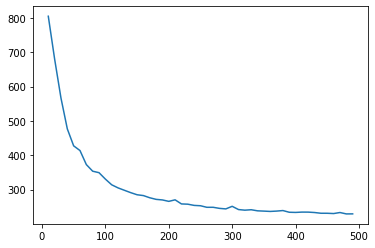

In [ ]:
def linear_svm(X,y):
    weights, l ,e = stochastic_gradient_descent(X,y)
    #print(l, e)
    return weights,l,e

import matplotlib.pyplot as plt
w, x_ , y_ = linear_svm(X_train,y_train)
loss=calculate_loss(X_train, y_train,w)

plt.plot(y_, x_)
print('-----------------------------------------------------------------------------')
print("Final Weights are:\n{}".format(w))




In [ ]:
def predict(X,w):
  a= X@w
  #print(a)
  a= np.where(a<0, -1, 1)
  return a

-----------------------------------------------------------------------------
Epoch: 10 Loss: [774.3943405]  
-----------------------------------------------------------------------------
Epoch: 20 Loss: [631.85062337]  
-----------------------------------------------------------------------------
Epoch: 30 Loss: [462.08774225]  
-----------------------------------------------------------------------------
Epoch: 40 Loss: [359.6265608]  
-----------------------------------------------------------------------------
Epoch: 50 Loss: [361.40936603]  
-----------------------------------------------------------------------------
Epoch: 60 Loss: [289.75729064]  
-----------------------------------------------------------------------------
Epoch: 70 Loss: [268.18000284]  
-----------------------------------------------------------------------------
Epoch: 80 Loss: [254.90611774]  
-----------------------------------------------------------------------------
Epoch: 90 Loss: [243.31974061]  
---

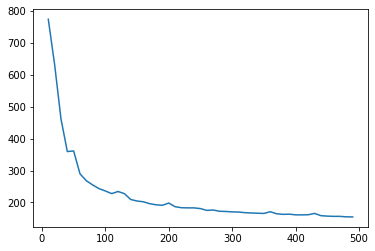

In [ ]:
# testing the model on test set make predictions
w, loss_ , epoch_ = linear_svm(X_test,y_test)
w_train, loss_x, epoch_y = linear_svm(X_train, y_train)
y_predicted =  predict(X_test, w)
y_train_pre= predict(X_train, w_train)
#print(y_predicted)
plt.plot( epoch_, loss_)
print("Test Accuracy: {}".format(accuracy_score(y_test, y_predicted)))

In [ ]:
print("Test Accuracy: {}".format(accuracy_score(y_test, y_predicted)))

Test Accuracy: 0.9385964912280702


In [ ]:
print("Train Accuracy: {}".format(accuracy_score(y_train, y_train_pre)))

Train Accuracy: 0.9120879120879121


In [ ]:
# calculate distance from each point to the decision boundary


distance= []

for i in range(0, X.shape[0]):
  distance.append(X[i]@w)

i= distance. index(min(distance))

print("index for closest point:", i)
print("nearest data point:" ,X[i])


# find the nearest data points and its index.


index for closest point: 265
nearest data point: [2.073e+01 3.112e+01 1.357e+02 1.419e+03 9.469e-02 1.143e-01 1.367e-01
 8.646e-02 1.769e-01 5.674e-02 1.172e+00 1.617e+00 7.749e+00 1.997e+02
 4.551e-03 1.478e-02 2.143e-02 9.280e-03 1.367e-02 2.299e-03 3.249e+01
 4.716e+01 2.140e+02 3.432e+03 1.401e-01 2.644e-01 3.442e-01 1.659e-01
 2.868e-01 8.218e-02]


decision function - if the values are positive then true otherwise false
<br>
index of the data closest to the boundary is 265 (calculated above)

